# LSTM-Model

This notebook uses **LSTM** to predict stock prices for **Apple (AAPL)** and **Microsoft (MSFT)** using historical data.

## Steps:
1. **Data Import**: Load cleaned stock data for Apple and Microsoft.
2. **Data Preprocessing**: Remove missing values and separate features and target columns (`close_aapl` for Apple and `close_msft` for Microsoft).
3. **Model Training**: Use **LSTM** to set up and train regression models, selecting the best-performing model.
4. **Model Evaluation**: Predict stock prices and calculate metrics such as **MAE**, **MSE**, **RMSE**, and **R-squared**.
5. **Results Visualization**: Plot actual vs predicted stock prices.
6. **Save Results**: Save model metrics and predictions to CSV files.


_This notebook was created by Huma Raja Liaqat_


This code imports several libraries and modules required for data manipulation, visualization, and building machine learning models:

- `pandas` for data handling and analysis.
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `numpy` for numerical operations.
- `MinMaxScaler` for feature scaling.
- `train_test_split` for splitting the data into training and testing sets.
- Keras components (`Sequential`, `Dense`, `LSTM`, `Adam`) for building and training deep learning models.
- `mean_squared_error` and `r2_score` for evaluating model performance.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score


This code imports the `os` and `pandas` libraries, and ensures the existence of a directory named `Results`:

- The `os` library is used to interact with the operating system, allowing the script to check if the `Results` directory exists.
- If the directory does not exist, it creates the directory using `os.makedirs()`.
- `pandas` is imported, likely for further data manipulation or saving results within the `Results` folder.


In [33]:
import os
import pandas as pd

output_directory = 'Results'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Apple

This code loads a CSV file into a pandas DataFrame:

- The `data` variable holds the file name `'AAPL_cleaned_data.csv'`.
- `pd.read_csv()` is used to read the CSV file into a DataFrame `df_aapl`.
  - `header=[0]` indicates that the first row contains column names.
  - `index_col=0` specifies that the first column should be used as the index.
- Finally, `df_aapl` is displayed, which contains the loaded data from the CSV file.


In [26]:
data = 'AAPL_cleaned_data.csv' 
df_aapl = pd.read_csv(data, header=[0], index_col=0) 
df_aapl

,adj close_aapl,close_aapl,high_aapl,low_aapl,open_aapl,volume_aapl
date,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2019-05-28,42.905396,44.557499,45.147499,44.477501,44.730000,111792800
2019-05-29,42.700783,44.345001,44.837502,44.000000,44.105000,113924800
2019-05-30,42.922245,44.575001,44.807499,44.167500,44.487499,84873600


This code performs a stock price prediction using an LSTM (Long Short-Term Memory) model with the AAPL stock data:

1. **Data Scaling:**
   - The `MinMaxScaler` is used to scale the 'close_aapl' column of the dataset into a range between 0 and 1.

2. **Dataset Creation:**
   - The `create_dataset()` function creates the input-output pairs for time-series prediction. It uses a sliding window of 60 time steps (`time_step=60`) to create the features (`X`) and target values (`y`).

3. **Data Reshaping and Splitting:**
   - The input data `X_AAPL` is reshaped to be 3D (samples, time steps, features) to fit the LSTM model.
   - The data is split into training and testing sets with 80% for training and 20% for testing using `train_test_split()`.

4. **Model Building:**
   - A Sequential LSTM model is built with two LSTM layers and one Dense output layer. The model is compiled with the Adam optimizer and a loss function of mean squared error.

5. **Model Training:**
   - The LSTM model is trained on the training data for 20 epochs with a batch size of 32.

6. **Prediction:**
   - The trained model is used to predict stock prices for the test data.
   - Predictions and actual values are inverse transformed to the original scale using `scaler.inverse_transform()`.

7. **Visualization:**
   - The actual vs. predicted AAPL stock prices are plotted on a graph, with the actual prices in blue and the predicted prices in red (dashed line).
   - The plot is displayed with appropriate labels, title, and legend.

This workflow demonstrates how to build and train an LSTM model for time-series stock price prediction and visualize the results.


Epoch 1/20


c:\Users\Huma Raja\Desktop\Thomas More\2023-2024(2APPAI01)\semester2\Artificial Intelligence\ML-Challenge\AI_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 4.3884e-04 - val_loss: 5.1805e-04
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 1.4503e-05 - val_loss: 0.0017
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 1.1112e-05 - val_loss: 0.0012
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 1.1180e-05 - val_loss: 4.0399e-04
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - loss: 1.2660e-05 - val_loss: 6.4056e-04
Epoch 6/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 1.2216e-05 - val_loss: 7.9696e-04
Epoch 7/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 1.0817e-05 - val_loss: 0.0036
Epoch 8/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 1.1050e-05 - val_loss: 0.0011
Epoch 9/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 1.0316e-05 - val_loss: 0.0016
Epoch 10/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 9.9898e-06 - val_loss: 2.6265e-04
Epoch 11/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 7.0458e-0

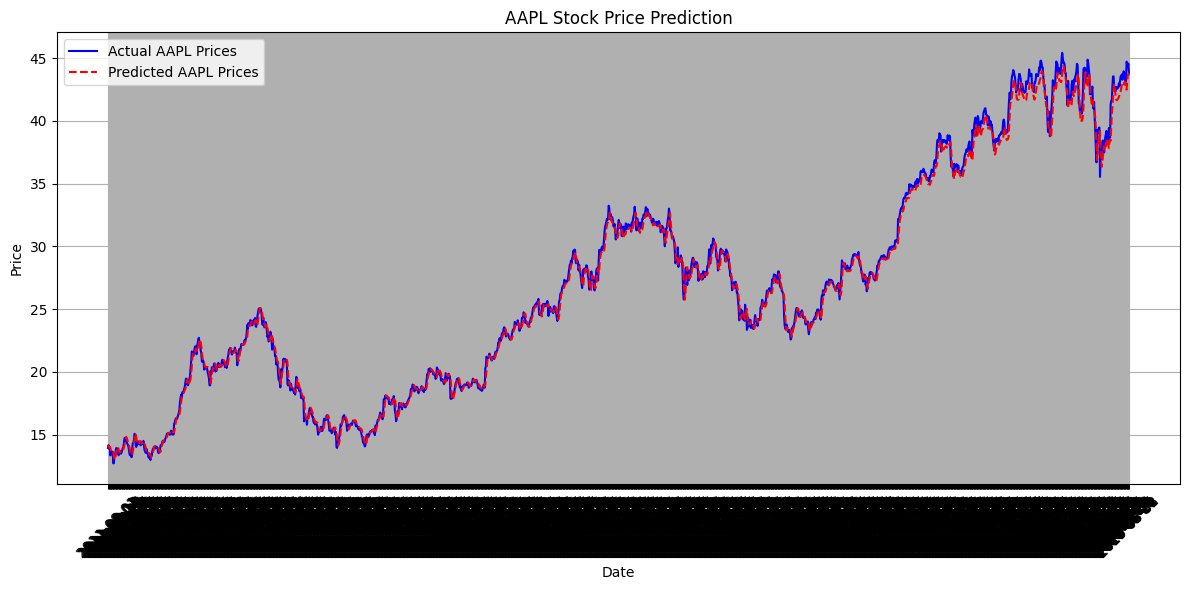

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_aapl[['close_aapl']].values)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_AAPL, y_AAPL = create_dataset(df_scaled, time_step)

X_AAPL = X_AAPL.reshape(X_AAPL.shape[0], X_AAPL.shape[1], 1)

X_train_AAPL, X_test_AAPL, y_train_AAPL, y_test_AAPL = train_test_split(X_AAPL, y_AAPL, test_size=0.2, shuffle=False)

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

model_AAPL = build_lstm_model(input_shape=(X_train_AAPL.shape[1], 1))

history_AAPL = model_AAPL.fit(X_train_AAPL, y_train_AAPL, epochs=20, batch_size=32, validation_data=(X_test_AAPL, y_test_AAPL))

predicted_AAPL = model_AAPL.predict(X_test_AAPL)
predicted_AAPL = scaler.inverse_transform(predicted_AAPL)
actual_AAPL = scaler.inverse_transform(y_test_AAPL.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(df_aapl.index[-len(y_test_AAPL):], actual_AAPL, label='Actual AAPL Prices', color='blue')
plt.plot(df_aapl.index[-len(y_test_AAPL):], predicted_AAPL, label='Predicted AAPL Prices', color='red', linestyle='--')
plt.title("AAPL Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This code calculates and prints the performance metrics for the AAPL stock price prediction model:

1. **Mean Squared Error (MSE):**
   - `mean_squared_error()` is used to compute the MSE between the actual and predicted AAPL stock prices. A lower MSE indicates better model performance.

2. **R-squared (R²):**
   - `r2_score()` calculates the R-squared value, which indicates the proportion of variance in the actual values that is explained by the model. A higher R² means better model fit.

3. **Adjusted R-squared:**
   - The formula for Adjusted R-squared accounts for the number of predictors (`p_AAPL`) and observations (`n_AAPL`). It adjusts the R² value to prevent overfitting, especially when adding more variables to the model.

4. **Results Display:**
   - The values of MSE, R-squared, and Adjusted R-squared are printed to evaluate the model's performance.


In [28]:
mse_AAPL = mean_squared_error(actual_AAPL, predicted_AAPL)
r2_AAPL = r2_score(actual_AAPL, predicted_AAPL)

n_AAPL = len(actual_AAPL)
p_AAPL = X_test_AAPL.shape[1]
adjusted_r2_AAPL = 1 - (1 - r2_AAPL) * (n_AAPL - 1) / (n_AAPL - p_AAPL - 1)

print(f'Apple (AAPL) - Mean Squared Error: {mse_AAPL:.2f}')
print(f'Apple (AAPL) - R-squared: {r2_AAPL:.4f}')
print(f'Apple (AAPL) - Adjusted R-squared: {adjusted_r2_AAPL:.4f}')

Apple (AAPL) - Mean Squared Error: 0.34
Apple (AAPL) - R-squared: 0.9956
Apple (AAPL) - Adjusted R-squared: 0.9954


This code saves the model evaluation metrics to a CSV file:

1. **Results Preparation:**
   - A list `results_AAPL` is created containing the metrics (MSE, R-squared, and Adjusted R-squared) and their corresponding values.

2. **File Output Path:**
   - The `output_file` path is constructed by joining the `output_directory` and the desired filename `'AAPL_lstm_model_results.csv'`.

3. **Writing to CSV:**
   - The `csv.writer` is used to write the results into the CSV file. The file is opened in write mode (`'w'`), with `newline=''` to prevent extra blank lines in the CSV.
   - The `writer.writerows()` method writes the `results_AAPL` list into the CSV file.

4. **Confirmation:**
   - A message is printed confirming that the results have been saved to the specified file.


In [41]:
import csv

results_AAPL = [
    ['Metric', 'Value'],
    ['MSE', mse_AAPL],
    ['R-squared', r2_AAPL],
    ['Adjusted R-squared', adjusted_r2_AAPL]
]

output_file = os.path.join(output_directory, 'AAPL_lstm_model_results.csv')

with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(results_AAPL)

print(f"Results saved to '{output_file}'")

Results saved to 'Results\AAPL_lstm_model_results.csv'


## Microsoft


This code loads a CSV file into a pandas DataFrame:

- The `data` variable holds the file name `'MSFT_cleaned_data.csv'`.
- `pd.read_csv()` is used to read the CSV file into a DataFrame `df_msft`.
  - `header=[0]` indicates that the first row contains column names.
  - `index_col=0` specifies that the first column should be used as the index.
- Finally, `df_msft` is displayed, which contains the loaded data from the CSV file.


In [29]:
data = 'MSFT_cleaned_data.csv' 
df_msft = pd.read_csv(data, header=[0], index_col=0) 
df_msft

,adj close_msft,close_msft,high_msft,low_msft,open_msft,volume_msft
date,,,,,,
1986-03-18,0.061429,0.099826,0.103299,0.098958,0.102431,67766400
1986-03-19,0.060361,0.098090,0.100694,0.097222,0.099826,47894400
1986-03-20,0.058758,0.095486,0.098090,0.094618,0.098090,58435200
1986-03-21,0.057156,0.092882,0.097222,0.091146,0.095486,59990400
1986-03-24,0.055554,0.090278,0.092882,0.089410,0.092882,65289600
...,...,...,...,...,...,...
2018-05-15,90.591499,97.320000,97.849998,96.339996,97.239998,24594000
2018-05-16,90.825218,97.150002,97.400002,96.620003,97.360001,17384700
2018-05-17,89.918381,96.180000,97.540001,95.830002,96.760002,17246700


This code performs a stock price prediction using an LSTM (Long Short-Term Memory) model with the MSFT stock data:

1. **Data Scaling:**
   - The `MinMaxScaler` is used to scale the 'close_msft' column of the dataset into a range between 0 and 1.

2. **Dataset Creation:**
   - The `create_dataset()` function creates the input-output pairs for time-series prediction. It uses a sliding window of 60 time steps (`time_step=60`) to create the features (`X`) and target values (`y`).

3. **Data Reshaping and Splitting:**
   - The input data `X_MSFT` is reshaped to be 3D (samples, time steps, features) to fit the LSTM model.
   - The data is split into training and testing sets with 80% for training and 20% for testing using `train_test_split()`.

4. **Model Building:**
   - A Sequential LSTM model is built with two LSTM layers and one Dense output layer. The model is compiled with the Adam optimizer and a loss function of mean squared error.

5. **Model Training:**
   - The LSTM model is trained on the training data for 20 epochs with a batch size of 32.

6. **Prediction:**
   - The trained model is used to predict stock prices for the test data.
   - Predictions and actual values are inverse transformed to the original scale using `scaler.inverse_transform()`.

7. **Visualization:**
   - The actual vs. predicted MSFT stock prices are plotted on a graph, with the actual prices in blue and the predicted prices in red (dashed line).
   - The plot is displayed with appropriate labels, title, and legend.

This workflow demonstrates how to build and train an LSTM model for time-series stock price prediction and visualize the results.


Epoch 1/20


c:\Users\Huma Raja\Desktop\Thomas More\2023-2024(2APPAI01)\semester2\Artificial Intelligence\ML-Challenge\AI_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


193/193 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0037 - val_loss: 6.7619e-04
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 1.6124e-04 - val_loss: 6.9681e-04
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 1.5369e-04 - val_loss: 4.1476e-04
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 1.2180e-04 - val_loss: 0.0018
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 1.2077e-04 - val_loss: 3.5736e-04
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 1.2814e-04 - val_loss: 1.9387e-04
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 1.0348e-04 - val_loss: 5.3342e-04
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 8.0111e-05 - val_loss: 7.2758e-04
Epoch 9/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 8.9598e-05 - val_loss: 3.8299e-04
Epoch 10/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 7.0585e-05 - val_loss: 3.7589e-04
Epoch 11/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 6.170

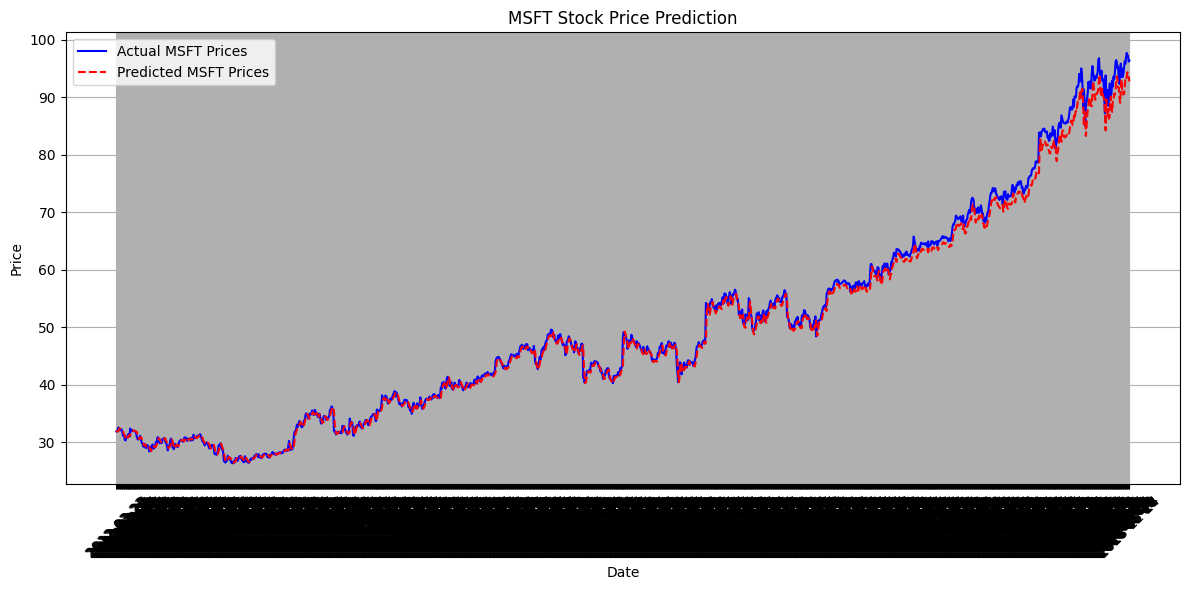

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_msft[['close_msft']].values)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_MSFT, y_MSFT = create_dataset(df_scaled, time_step)

X_MSFT = X_MSFT.reshape(X_MSFT.shape[0], X_MSFT.shape[1], 1)

X_train_MSFT, X_test_MSFT, y_train_MSFT, y_test_MSFT = train_test_split(X_MSFT, y_MSFT, test_size=0.2, shuffle=False)

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

model_MSFT = build_lstm_model(input_shape=(X_train_MSFT.shape[1], 1))

history_MSFT = model_MSFT.fit(X_train_MSFT, y_train_MSFT, epochs=20, batch_size=32, validation_data=(X_test_MSFT, y_test_MSFT))

predicted_MSFT = model_MSFT.predict(X_test_MSFT)
predicted_MSFT = scaler.inverse_transform(predicted_MSFT)
actual_MSFT = scaler.inverse_transform(y_test_MSFT.reshape(-1, 1))

plt.figure(figsize=(12, 6))

plt.plot(df_msft.index[-len(y_test_MSFT):], actual_MSFT, label='Actual MSFT Prices', color='blue')
plt.plot(df_msft.index[-len(y_test_MSFT):], predicted_MSFT, label='Predicted MSFT Prices', color='red', linestyle='--')
plt.title("MSFT Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This code calculates and prints the performance metrics for the MSFT stock price prediction model:

1. **Mean Squared Error (MSE):**
   - `mean_squared_error()` is used to compute the MSE between the actual and predicted MSFT stock prices. A lower MSE indicates better model performance.

2. **R-squared (R²):**
   - `r2_score()` calculates the R-squared value, which indicates the proportion of variance in the actual values that is explained by the model. A higher R² means better model fit.

3. **Adjusted R-squared:**
   - The formula for Adjusted R-squared accounts for the number of predictors (`p_MSFT`) and observations (`n_MSFT`). It adjusts the R² value to prevent overfitting, especially when adding more variables to the model.

4. **Results Display:**
   - The values of MSE, R-squared, and Adjusted R-squared are printed to evaluate the model's performance.


In [31]:
mse_MSFT = mean_squared_error(actual_MSFT, predicted_MSFT)
r2_MSFT = r2_score(actual_MSFT, predicted_MSFT)

n_MSFT = len(actual_MSFT)
p_MSFT = X_test_MSFT.shape[1]
adjusted_r2_MSFT = 1 - (1 - r2_MSFT) * (n_MSFT - 1) / (n_MSFT - p_MSFT - 1)

print(f'Microsoft (MSFT) - Mean Squared Error: {mse_MSFT:.2f}')
print(f'Microsoft (MSFT) - R-squared: {r2_MSFT:.4f}')
print(f'Microsoft (MSFT) - Adjusted R-squared: {adjusted_r2_MSFT:.4f}')

Microsoft (MSFT) - Mean Squared Error: 1.71
Microsoft (MSFT) - R-squared: 0.9947
Microsoft (MSFT) - Adjusted R-squared: 0.9945


This code saves the model evaluation metrics to a CSV file:

1. **Results Preparation:**
   - A list `results_MSFT` is created containing the metrics (MSE, R-squared, and Adjusted R-squared) and their corresponding values.

2. **File Output Path:**
   - The `output_file` path is constructed by joining the `output_directory` and the desired filename `'MSFT_lstm_model_results.csv'`.

3. **Writing to CSV:**
   - The `csv.writer` is used to write the results into the CSV file. The file is opened in write mode (`'w'`), with `newline=''` to prevent extra blank lines in the CSV.
   - The `writer.writerows()` method writes the `results_MSFT` list into the CSV file.

4. **Confirmation:**
   - A message is printed confirming that the results have been saved to the specified file.


In [43]:
import csv

results_MSFT = [
    ['Metric', 'Value'],
    ['MSE', mse_MSFT],
    ['R-squared', r2_MSFT],
    ['Adjusted R-squared', adjusted_r2_MSFT]
]

output_file = os.path.join(output_directory, 'MSFT_lstm_model_results.csv')

with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(results_MSFT)

print(f"Results saved to '{output_file}'")

Results saved to 'Results\MSFT_lstm_model_results.csv'
